# Pre processing images using CNN

In [122]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [123]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
import cv2
import pickle
import pandas as pd
np.random.seed(0)

In [125]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as g:
    val_data = pickle.load(g)
with open('german-traffic-signs/test.p', 'rb') as h:
    test_data = pickle.load(h)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [143]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32)
(12630, 32, 32)


In [127]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images are not equal to the number of labels."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images are not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images are not equal to the number of labels."
assert(X_train.shape[1:]==(32, 32, 3)), "The dimensions of thje images are not 32 x 32 x 3"
assert(X_val.shape[1:]==(32, 32, 3)), "The dimensions of thje images are not 32 x 32 x 3"
assert(X_test.shape[1:]==(32, 32, 3)), "The dimensions of thje images are not 32 x 32 x 3"

In [128]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

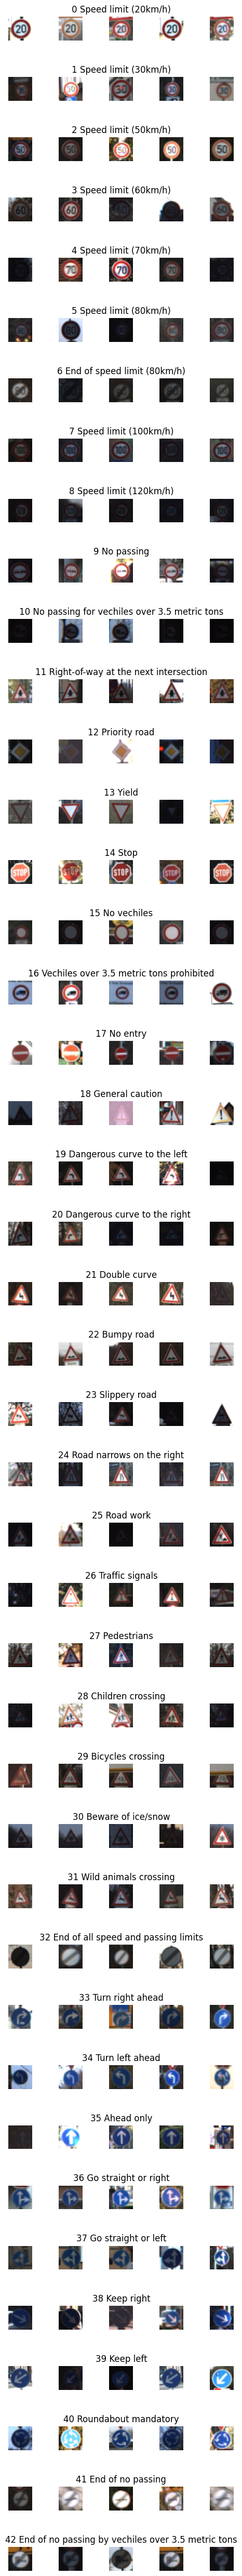

In [129]:
num_of_samples=[]
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + ' ' + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


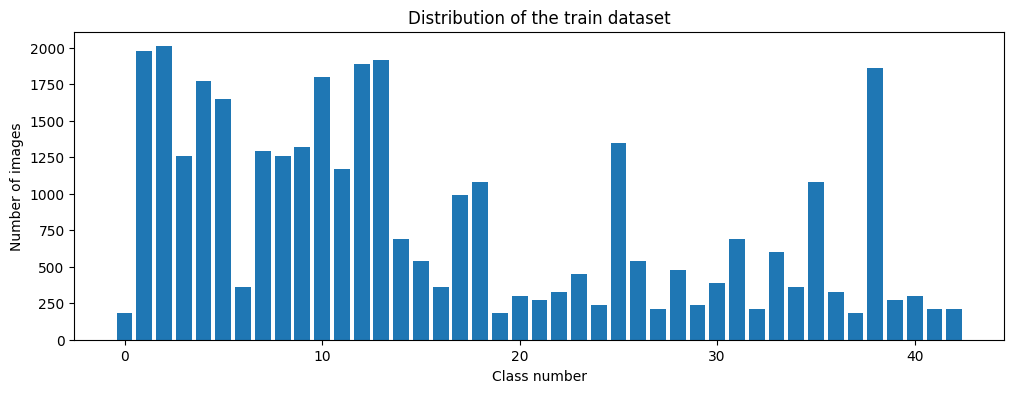

In [130]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
31


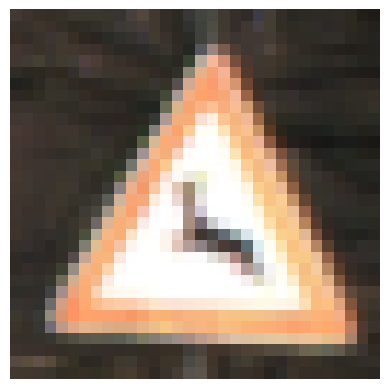

In [131]:
plt.imshow(X_train[850])
plt.axis('off')
print(X_train[850].shape)
print(y_train[850])

(32, 32)


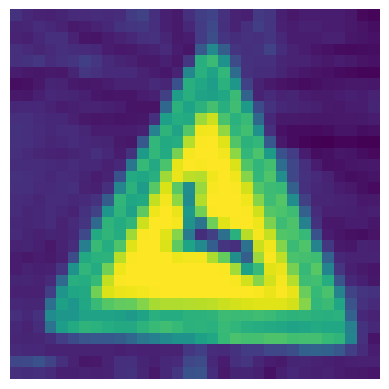

In [132]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[850])

plt.imshow(img)
plt.axis('off')
print(img.shape)


(32, 32)


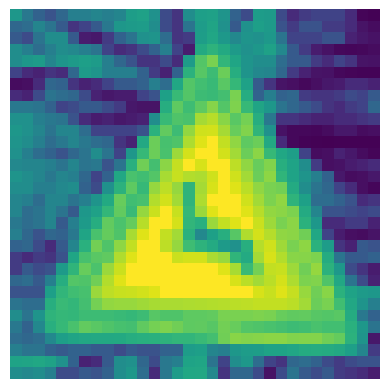

In [133]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)

plt.imshow(img)
plt.axis('off')
print(img.shape)

In [134]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))



(34799, 32, 32)


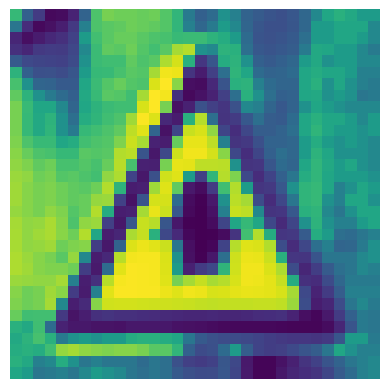

In [140]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [145]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32)
X_test = X_test.reshape(12630, 32, 32)

In [146]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)